look into the impact that galaxies with zero SFRs have on the SSFR distribution

In [8]:
import numpy as np 
# -- local -- 
import env
import util as UT
import catalogs as Cats
from fstarforms import fstarforms

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [28]:
def pSSFR_withzeros(cat_name): 
    Cat = Cats.Catalog()
    _logM, _logSFR, w, censat = Cat.Read(cat_name, keepzeros=True)
    iscen_nonzero = (censat == 1) & np.invert(Cat.zero_sfr)
    iscen_zero = (censat == 1) & Cat.zero_sfr
    assert np.sum(censat == 1) == np.sum(iscen_nonzero) + np.sum(iscen_zero)
    
    mbins = np.linspace(8., 11.4, 17)
    fig = plt.figure(figsize=(12, 12))
    bkgd = fig.add_subplot(111, frameon=False)
    for i in range(len(mbins)-1):
        sub = fig.add_subplot(4,4,i+1)
        iscen_nz_mbin = iscen_nonzero & (_logM > mbins[i]) & (_logM < mbins[i+1])
        iscen_z_mbin  = iscen_zero & (_logM > mbins[i]) & (_logM < mbins[i+1])
        ngal_bin = float(np.sum((_logM > mbins[i]) & (_logM < mbins[i+1])))

        h0, h1 = np.histogram((_logSFR - _logM)[iscen_nz_mbin], bins=40, range=[-14., -8.])#, normed=True)
        bar_x, bar_y = UT.bar_plot(h1, h0)
        sub.fill_between(bar_x, np.zeros(len(bar_y)), bar_y/ngal_bin)

        h0, h1 = np.histogram(np.repeat(-15.1, np.sum(iscen_z_mbin)), bins=1, range=[-15.2, -15.])#, normed=True)

        bar_x, bar_y = UT.bar_plot(h1, h0)
        sub.fill_between(bar_x, np.zeros(len(bar_y)), bar_y/ngal_bin)
        sub.set_xlim([-15.4, -8])
    bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    bkgd.set_ylabel(r'P(log SSFR  $[yr^{-1}])$', labelpad=10, fontsize=20)
    bkgd.set_xlabel(r'log SSFR  $[yr^{-1}]$', labelpad=10, fontsize=20)
    return None


------ illustris_100myr ------
16943 of 66808 galaxies have 0/non-finite SFRs


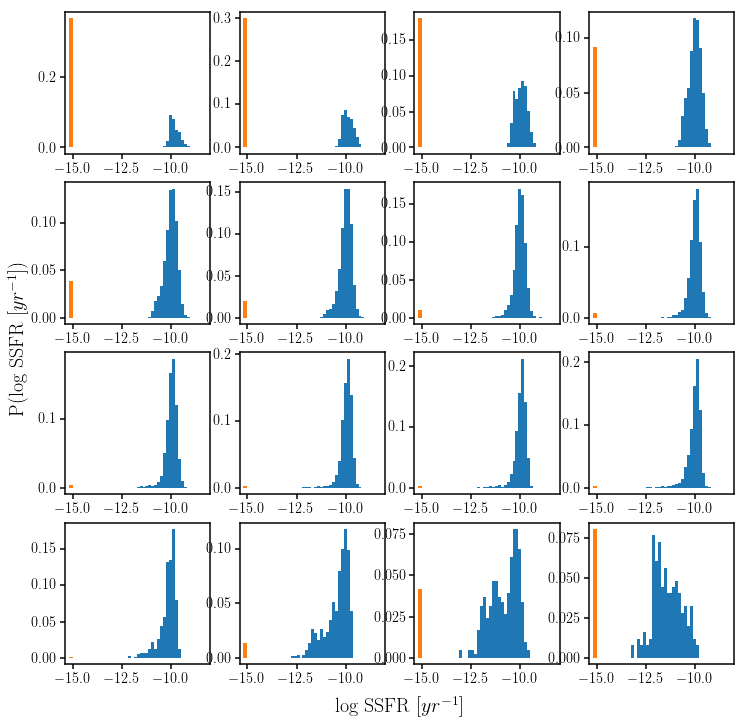

In [29]:
pSSFR_withzeros('illustris_100myr')


------ illustris_inst ------
7000 of 66808 galaxies have 0/non-finite SFRs


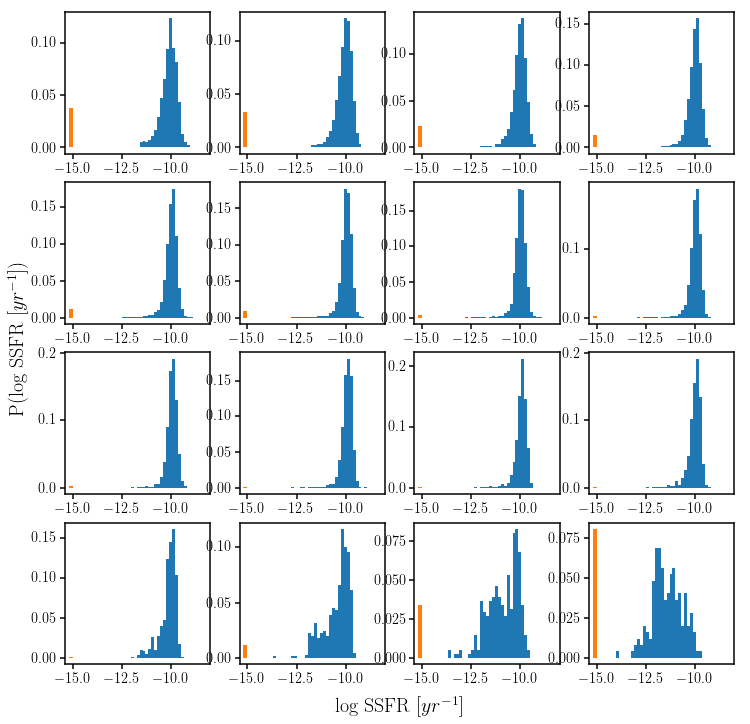

In [30]:
pSSFR_withzeros('illustris_inst')

/Users/chang/projects/LetsTalkAboutQuench/letstalkaboutquench/catalogs.py:94: RuntimeWarning: divide by zero encountered in log10
  logSFR = np.log10(_SFR) # log SFRs

------ eagle_100myr ------
14743 of 29810 galaxies have 0/non-finite SFRs
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in divide
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in divide


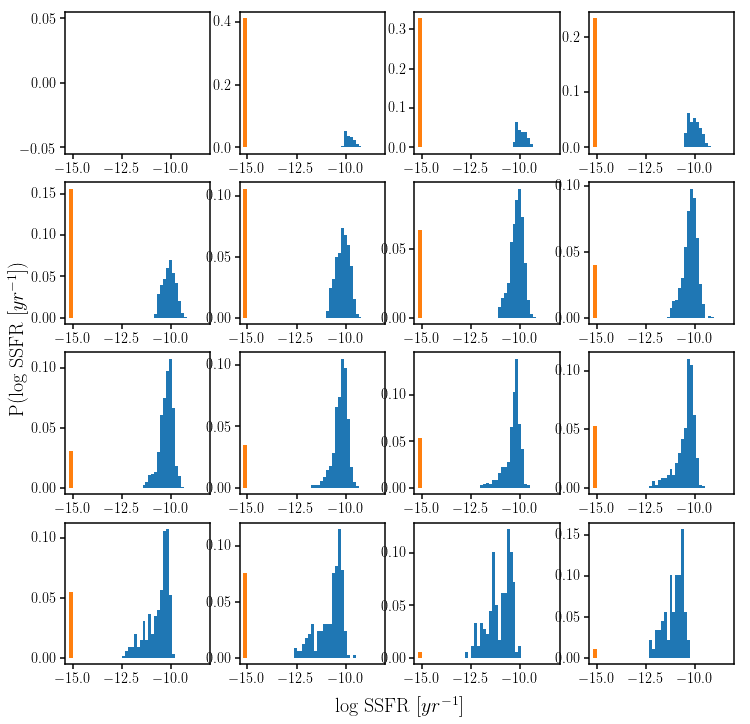

In [31]:
pSSFR_withzeros('eagle_100myr')


------ eagle_inst ------
10295 of 29810 galaxies have 0/non-finite SFRs
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in divide
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in divide


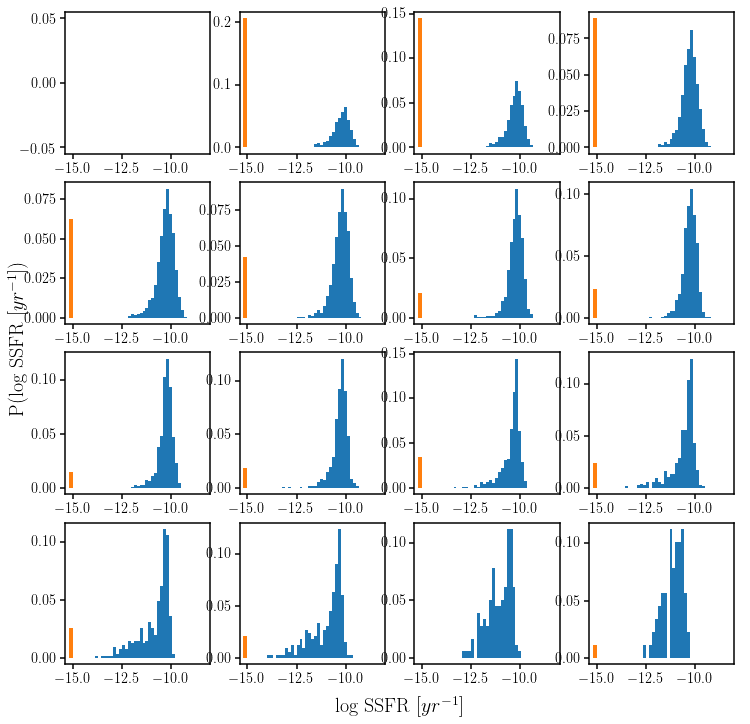

In [32]:
pSSFR_withzeros('eagle_inst')


------ mufasa_100myr ------
4811 of 7973 galaxies have 0/non-finite SFRs
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in divide
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in divide


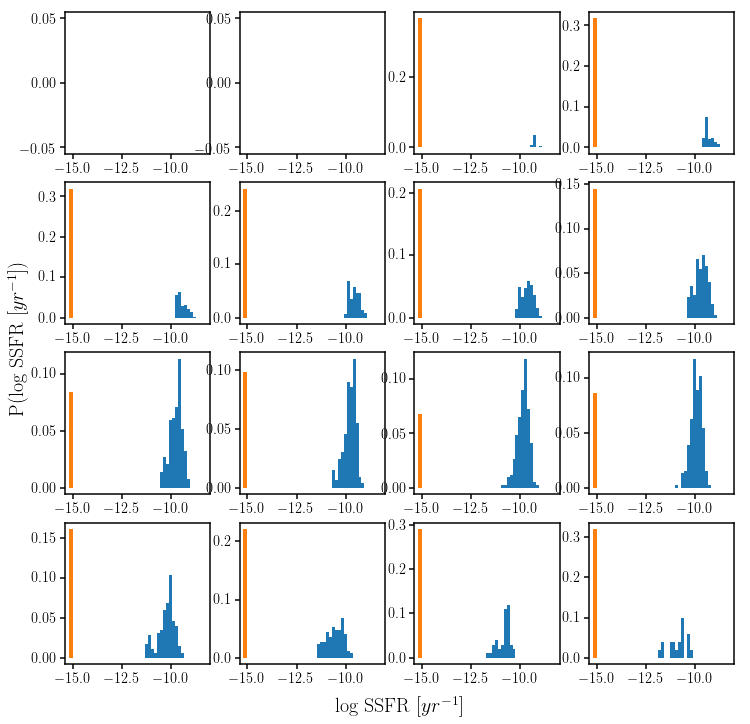

In [33]:
pSSFR_withzeros('mufasa_100myr')


------ mufasa_inst ------
0 of 7973 galaxies have 0/non-finite SFRs
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in divide
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in divide


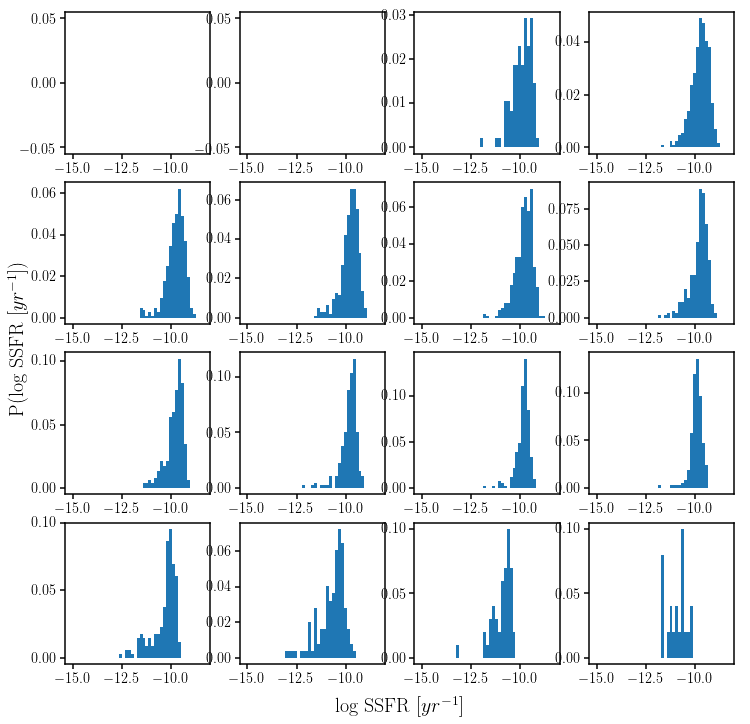

In [34]:
pSSFR_withzeros('mufasa_inst')

/Users/chang/projects/LetsTalkAboutQuench/letstalkaboutquench/catalogs.py:132: RuntimeWarning: divide by zero encountered in log10
  logM = np.log10(_M) + 9.
/Users/chang/projects/LetsTalkAboutQuench/letstalkaboutquench/catalogs.py:133: RuntimeWarning: divide by zero encountered in log10
  logSFR = np.log10(_SFR)

------ scsam_100myr ------
4854 of 66090 galaxies have 0/non-finite SFRs
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in subtract


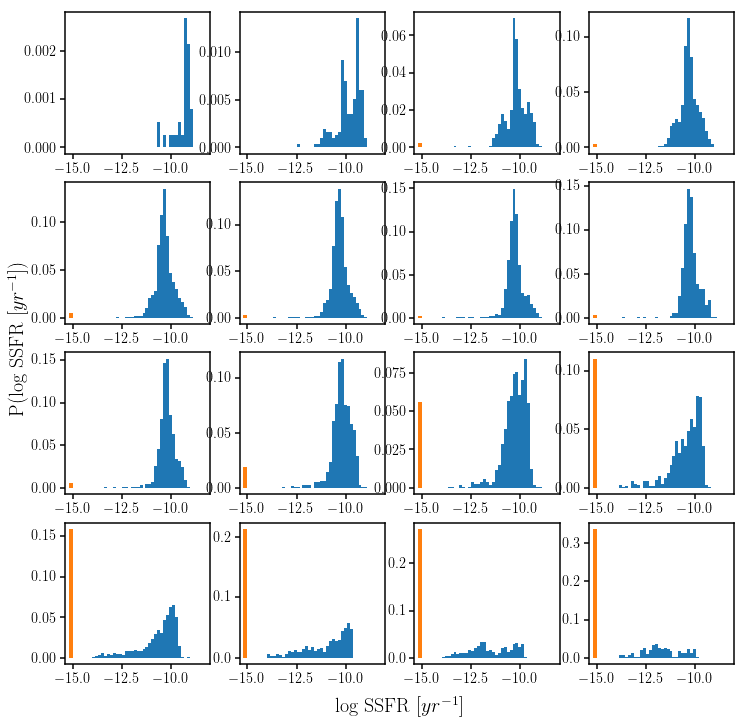

In [35]:
pSSFR_withzeros('scsam_100myr')


------ scsam_inst ------
5073 of 66090 galaxies have 0/non-finite SFRs
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in subtract


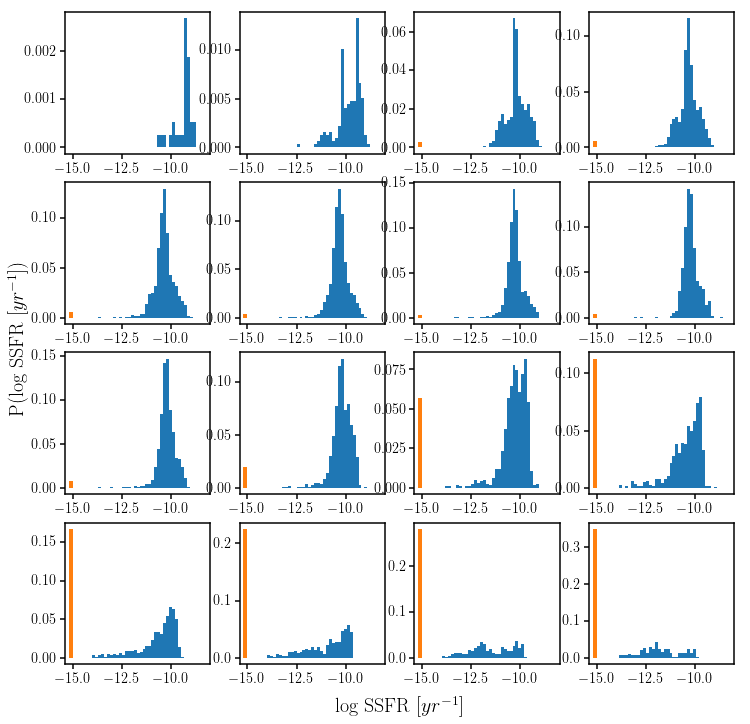

In [36]:
pSSFR_withzeros('scsam_inst')